In [1]:
from scipy.io.wavfile import read, write
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs, x = read('trumpet.wav')
# fs, x = read('oboe.wav')
# fs, x = read('organ.wav')
# x = x[:,0]   # left channel
X = fft(x[:10000])
abs_X = abs(X)

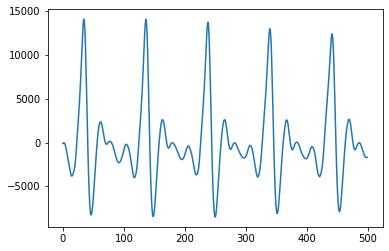

In [3]:
plt.plot(x[3000:3500])

(0, 5000)

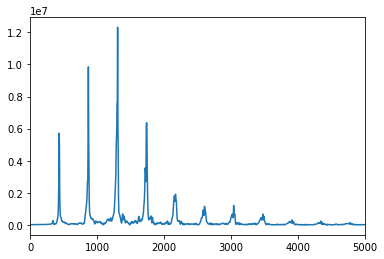

In [4]:
f = np.linspace(0, fs, 10000)
plt.plot(f, abs_X)
plt.xlim([0,5000])

In [5]:
# print(np.argmax(abs_X))

temp_list = []

for i in range(40):
    if max(abs_X[50*i:50*i+49]) > max(abs_X) * 1/22:
        temp_list.append(50*i + np.argmax(abs_X[50*i:50*i+49]))

In [6]:
my_list = []
my_list.append(temp_list[0])
for i in range(1,len(temp_list)):
    if temp_list[i] - temp_list[i-1] >= 20:
        my_list.append(temp_list[i])

In [7]:
from synthesizer import sound_synthesizer

r = [ 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9' ]
timbre_config = {}

total = sum(abs_X[my_list])
for i in range(9):
    if i < len(my_list):
        timbre_config[r[i]] = abs_X[my_list[i]] / total
    else:
        timbre_config[r[i]] = 0

frequency = fs / 10000 * my_list[0]
sound_synthesizer(1, frequency, 48000, timbre_config, 'wow.wav')

# frequency_list = [ 261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25 ] 
# sound_synthesizer(2, frequency_list, 24000, timbre_config, 'wow.wav')

In [8]:
import json

with open('data.txt', 'w') as outfile:
    json.dump(timbre_config, outfile)